# Homework 3

**Name:** Chengjun Liu

The problems in this homework do not require complex commands, but require you to exercise algorithmic thinking. It is recommended that you follow the four step method (Describe, Decompose, Translate, and Combine) when solving the problems, and to build up the solution incrementally instead of writing a function to start off.

## Q1. Optimal Stocking Level

Write a function named `optBaseStock` with four input arguments:

- `levelList`: a list of possible stocking levels to optimize over (which can be a `range` instead of a `list`).
- `demandList`: a list of demand scenarios. 
- `underage`: the unit cost of having too little inventory to meet demand.
- `overage`: the unit cost of having too much inventory.

The function should iterate through the possible stocking levels in `levelList`, and print one line giving the average inventory cost for that stocking level. For a given stocking level, the average inventory cost is defined as the average over all demand scenarios of the total underage cost plus the total overage cost. 

For example, if the stocking level is 10, and the demand scenarios are `[6,12,14]`, and the parameters `underage=9`, `overrage=5`. Then the inventory cost for the scenario `demand=6` is $(10-6)\times 5=20$, because the inventory level is 4 units too high. (The overage cost of 5/unit is applied when inventory is too high). The inventory cost for the scenario `demand=12` is $(12-10)\times 9=18$, because the inventory level is 2 units too low. (The underage cost of 9/unit is applied when the inventory is too low.) The inventory cost for the scenario `demand=14` is $(14-10)\times 9=36$, because the inventory level is 4 units too low. The average inventory cost for stocking level 10 is $(20+18+36)/3=74/3\approx 24.67$.  

The function should return two objects. The first object is the stocking level that achieves the minimal average inventory cost (if there is a tie, return the smallest stocking level yielding the minimal cost). The second object is a dictionary mapping each inventory level to the average inventory cost for that stocking level. 

In [3]:
def optBaseStock(levelList, demand, underage, overage):
    avgdict={}
    for i in levelList:
        costlist=[]
        for j in demand:
            if i>=j:
                costlist.append((i-j)*overage)
            else:
                costlist.append((j-i)*underage)
        avgdict[i]=sum(costlist)/len(costlist)
    
    bestLevel=list(avgdict.keys())[0]
    bestcost=avgdict[bestLevel]
    for i in list(avgdict.keys()):
        if avgdict[i]<bestcost:
            bestcost=avgdict[i]
            bestLevel=i
    
    return bestLevel,avgdict

The following code illustrates the use of the function (after you complete the function). (Hint: it may be easiest to write another function which calculates the average inventory cost given a particular stocking level, so that `optBaseStock` can simply call this other function to compute the average inventory cost for each stocking level.)

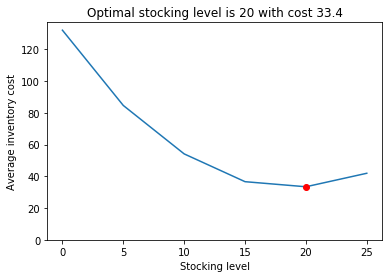

In [4]:
demandList=[10,18,5,20,16,30,15,3,5,10]
levelList=range(0,30,5)
underage=10
overage=3
bestLevel,cost=optBaseStock(levelList,demandList,underage,overage)

import matplotlib.pyplot as plt
levelList=sorted(levelList)
costList=[cost[level] for level in levelList]
plt.plot(levelList,costList)
plt.plot([bestLevel],[cost[bestLevel]],'ro')
plt.title(f'Optimal stocking level is {bestLevel} with cost {round(cost[bestLevel],2)}')
plt.xlabel('Stocking level')
plt.ylabel('Average inventory cost')
plt.ylim(bottom=0)
plt.show()

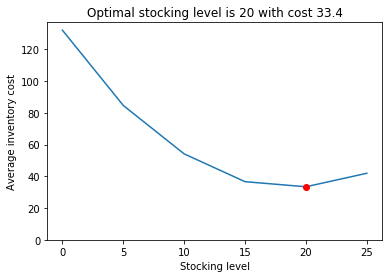

In [9]:
demandList=[10,18,5,20,16,30,15,3,5,10]
levelList=range(0,30,5)
underage=10
overage=3
bestLevel,cost=optBaseStock(levelList,demandList,underage,overage)

import matplotlib.pyplot as plt
levelList=sorted(levelList)
costList=[cost[level] for level in levelList]
plt.plot(levelList,costList)
plt.plot([bestLevel],[cost[bestLevel]],'ro')
plt.title(f'Optimal stocking level is {bestLevel} with cost {round(cost[bestLevel],2)}')
plt.xlabel('Stocking level')
plt.ylabel('Average inventory cost')
plt.ylim(bottom=0)
plt.show()

## Q2. Demand Estimation with N substitutable products

This exercise generalizes Case 9 to $n$ products, where $n$ is any positive integer.

Write a function called `demand` with two input arguments:

- `prices`: a list of $n$ prices, one for each product. 
- `values`: a list in which each element represents a customer and is a list of length $n$, which corresponds to the customer's valuation for each of the $n$ products.

The function should return a list of length $n$ representing the number of each product sold. You should assume that each customer:

- Does not purchase anything if his/her valuation for each product is strictly less than its price.
- Otherwise, purchase the product in which the difference between his/her valuation and the price is the largest. When there is a tie, the customer will purchase the product with the smaller index. 

For example, if `prices=[10,8,12]`, then

- A customer with valuations `[9,7,11]` purchases nothing.
- A customer with valuations `[10,8,12]` purchases product 0.
- A customer with valuations `[9,8,12]` purchases product 1.
- A customer with valuations `[9,8,13]` purchases product 2.

In [9]:
def demand(prices,values):
    productlist=[]
    for single in values:
        explist=[single[i]-prices[i] for i in range(len(prices))]

        exp=explist[0]
        product=0
        for i in range(len(prices)):
            if explist[i]>exp:
                exp=explist[i]
                product=i
                
        if exp<0:
            productlist.append(-1)
        else:
            productlist.append(product)
    
    demandcount=[]
    for i in range(len(prices)):
        demandcount.append(sum([j==i for j in productlist]))
    
    return demandcount

False

The following code can be used to test your function.

In [10]:
prices=[10,8,12]
values=[[9,7,11],[10,8,12],[9,8,12],[9,8,13]]
ans=demand(prices,values)
for i in range(len(prices)):
    print('Demand for product',i,':',ans[i])

Demand for product 0 : 1
Demand for product 1 : 1
Demand for product 2 : 1


In [11]:
prices=[20,15,30]
values=[[30,30,20],[40,10,15],[18,13,29],[40,30,50],[10,30,50],[10,10,10],[20,15,30]]
ans=demand(prices,values)
for i in range(len(prices)):
    print('Demand for product',i,':',ans[i])

Demand for product 0 : 3
Demand for product 1 : 1
Demand for product 2 : 1


In [4]:
prices=[10,8,12]
values=[[9,7,11],[10,8,12],[9,8,12],[9,8,13]]
ans=demand(prices,values)
for i in range(len(prices)):
    print('Demand for product',i,':',ans[i])

Demand for product 0 : 1
Demand for product 1 : 1
Demand for product 2 : 1


In [5]:
prices=[20,15,30]
values=[[30,30,20],[40,10,15],[18,13,29],[40,30,50],[10,30,50],[10,10,10],[20,15,30]]
ans=demand(prices,values)
for i in range(len(prices)):
    print('Demand for product',i,':',ans[i])

Demand for product 0 : 3
Demand for product 1 : 1
Demand for product 2 : 1


## Q3. Simulating Availabilities of Hospital Beds

One challenge in health care operations is to forecast the number of hospital beds that are available at a given time, since patients admitted in the past may stay for several days and the number of beds are limited. If no more beds are available, then incoming patients may need to be turned away.

Write a function called `admissionSimulation` with three input arguments:

- `demand`: a list of positive integers representing the number of incoming patients desiring a hospital bed in each day. (The first number corresponds to day 0, the second number to day 1, and so on.)
- `beds`: a positive integer representing the total number of hospital beds available.
- `stay`: a positive integer representing the number of days each admitted patient will stay. If `stay=1`, then every admitted patient leaves before any incoming patients arrive the next day. If `stay=2`, then each patient admitted on day $t$ will occupy a bed also for day $t+1$, and only leave before incoming patients arrive on day $t+2$.

The function should return a list `admissionRecord`, corresponding to the number of incoming patients admitted on each day. 



In [23]:
def admissionSimulation(demand,beds,stay):
    admissionRecord=[0]*(stay-1)
    currentbeds=beds
    for i in range(len(demand)):
        if demand[i]<=currentbeds:
            admissionRecord.append(demand[i])
            currentbeds=currentbeds-demand[i]+admissionRecord[-(stay)]
        else:
            admissionRecord.append(currentbeds)
            currentbeds=admissionRecord[-(stay)]
    
    admissionRecord=admissionRecord[stay-1:]
    return admissionRecord
    

In [24]:
demand=[1,2,1,0,2,3]
beds=2
stay=2
admissionRecord=admissionSimulation(demand,beds,stay)
for i in range(len(demand)):
    print('On day',i,'demand is',demand[i],'and',admissionRecord[i],'patients were admitted.')

On day 0 demand is 1 and 1 patients were admitted.
On day 1 demand is 2 and 1 patients were admitted.
On day 2 demand is 1 and 1 patients were admitted.
On day 3 demand is 0 and 0 patients were admitted.
On day 4 demand is 2 and 2 patients were admitted.
On day 5 demand is 3 and 0 patients were admitted.


In [25]:
demand=[5,8,6,8,4,4,8,6,1]
beds=7
stay=3
admissionRecord=admissionSimulation(demand,beds,stay)
for i in range(len(demand)):
    print('On day',i,'demand is',demand[i],'and',admissionRecord[i],'patients were admitted.')

On day 0 demand is 5 and 5 patients were admitted.
On day 1 demand is 8 and 2 patients were admitted.
On day 2 demand is 6 and 0 patients were admitted.
On day 3 demand is 8 and 5 patients were admitted.
On day 4 demand is 4 and 2 patients were admitted.
On day 5 demand is 4 and 0 patients were admitted.
On day 6 demand is 8 and 5 patients were admitted.
On day 7 demand is 6 and 2 patients were admitted.
On day 8 demand is 1 and 0 patients were admitted.


In [7]:
demand=[1,2,1,0,2,3]
beds=2
stay=2
admissionRecord=admissionSimulation(demand,beds,stay)
for i in range(len(demand)):
    print('On day',i,'demand is',demand[i],'and',admissionRecord[i],'patients were admitted.')

On day 0 demand is 1 and 1 patients were admitted.
On day 1 demand is 2 and 1 patients were admitted.
On day 2 demand is 1 and 1 patients were admitted.
On day 3 demand is 0 and 0 patients were admitted.
On day 4 demand is 2 and 2 patients were admitted.
On day 5 demand is 3 and 0 patients were admitted.


In [8]:
demand=[5,8,6,8,4,4,8,6,1]
beds=7
stay=3
admissionRecord=admissionSimulation(demand,beds,stay)
for i in range(len(demand)):
    print('On day',i,'demand is',demand[i],'and',admissionRecord[i],'patients were admitted.')

On day 0 demand is 5 and 5 patients were admitted.
On day 1 demand is 8 and 2 patients were admitted.
On day 2 demand is 6 and 0 patients were admitted.
On day 3 demand is 8 and 5 patients were admitted.
On day 4 demand is 4 and 2 patients were admitted.
On day 5 demand is 4 and 0 patients were admitted.
On day 6 demand is 8 and 5 patients were admitted.
On day 7 demand is 6 and 2 patients were admitted.
On day 8 demand is 1 and 0 patients were admitted.
